# Note: I'm not using this in my capstone. This would be fun to come back to at some point

# Discussion of "One Hit Wonders" (Top 100) and "True One Hit Wonders"  (Top 40).

# Comparing on three levels:

## 1) by debut year: artists that appeared once on chart vs all artists
## 2) by debut year: artists that appeared in top 40 once vs all artists to appear in top 40
## 3) by debut year: artists that appeared in top 40 once vs all artists to appear in top 100

In [1]:
# Note: Frankie Valli and the 4 seasons have been a pain - address if I have time, but I'm willing to let it go.  

In [2]:
# Packages and Settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# importing Billboard CSV
billboard_df = pd.read_csv('data/Hot_Stuff.csv')

In [4]:
# Converting WeekID to datetime
# Note: I'm comfortable with replacing the string column "WeekID"

billboard_df['WeekID'] = pd.to_datetime(billboard_df['WeekID'])

In [5]:
# Renaming columns to Python standards

billboard_df = billboard_df.rename(columns={"url": "url", "WeekID": "week_id", "Week Position": 'week_position', "Song": 'song', "Performer": "performer", "SongID": "song_id", "Instance": "instance", "Previous Week Position": "prev_week_position", "Peak Position": "peak_position", "Weeks on Chart": "weeks_on_chart"})

In [6]:
# dropping 'URL' column- I don't think I'll reference it for now

billboard_df = billboard_df.drop(columns=['url'])

In [7]:
#creating date/month/day/year columns

billboard_df['date']= billboard_df['week_id'].dt.date
billboard_df['month'] = billboard_df['week_id'].dt.month
billboard_df['day']= billboard_df['week_id'].dt.day
billboard_df['year'] = billboard_df['week_id'].dt.year

In [8]:
# replacing artist names: pre string-split

billboard_df["performer"]= billboard_df["performer"].replace("Elvis Presley With The Jordanaires", "Elvis Presley") 
billboard_df["performer"]= billboard_df["performer"].replace("James Brown And The Famous Flames", "James Brown") 
billboard_df["performer"]= billboard_df["performer"].replace("Prince and the Revolution", "Prince") 


In [9]:
# String Split
new = billboard_df["performer"].str.split(" Featuring ", n = 1, expand = True) 
billboard_df["main_performer"]= new[0] 
billboard_df["featured_performer"]= new[1] 

In [10]:
# Post-String Split replacements of artist names
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Janet Jackson", "Janet")
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Jay Z", "Jay-Z")
billboard_df["featured_performer"]= billboard_df["featured_performer"].replace("Janet Jackson", "Janet")
billboard_df["featured_performer"]= billboard_df["featured_performer"].replace("Jay Z", "Jay-Z")
# Frankie Valli and the 4 Seasons
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Frankie Valli", "The 4 Seasons")

In [11]:
billboard_df.shape

(317795, 15)

In [12]:
# Creating "chart-points" variable (formerly known as "week-points") 
# note: I'm going to keep these as floats: I don't think I need them as floats for anything,
# but if this is all eventually going into one notebook, then I don't see the harm
billboard_df['chart_points'] = billboard_df.apply(lambda row: 101- row.week_position, axis=1).astype(float)
billboard_df['weeks_on_chart'] = billboard_df['weeks_on_chart'].astype(float)

# This is my attempt to capture one-hit wonders: 

## 1) groupby main performer and use nunique
## 2)code variable similar to "has feature": 1 if number of unique songs is 1, 0 otherwise
## 2b)
## 3) next step is to recreate "debut year" dataframe: groupby mainperformer, minimum
## 4) join dataframes like the "unique performers per year" and do a groupby year

In [13]:
# STEP 1: creating initial groupby
# note: I might have to play with some resetting of indices: not sure yet

main_performer_groupby = billboard_df.groupby(['main_performer']).nunique()

In [14]:
#main_performer_groupby = main_performer_groupby.reset_index()

In [15]:
# STEP 2: applying "one hit wonder" lambda

main_performer_groupby['is_one_hit_wonder'] = main_performer_groupby.song_id.apply(lambda x: 1 if x ==1 else 0)

In [16]:
main_performer_groupby.head(200)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,chart_points,is_one_hit_wonder
main_performer,,,,,,,,,,,,,,,,,
"""Groove"" Holmes",14,13,2,1,2,1,11,11,11,14,5,14,1,1,0,13,0
"""Little"" Jimmy Dickens",10,10,1,1,1,1,9,8,10,10,3,10,1,1,0,10,1
"""Pookie"" Hudson",1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1
"""Weird Al"" Yankovic",84,59,11,1,11,1,55,29,20,84,11,31,9,1,0,59,0
'N Sync,172,68,10,2,10,1,64,43,26,172,12,30,5,1,1,68,0
'N Sync & Gloria Estefan,20,18,1,1,1,2,16,6,20,20,5,16,2,1,0,18,1
'Til Tuesday,51,43,5,1,5,1,40,34,21,51,12,22,4,1,0,43,0
(+44),1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1
(The Preacher) Bobby Womack,9,7,1,1,1,1,7,5,9,9,3,9,1,1,0,7,1


In [17]:
# dropping all extraneous columns from main_performer_groupby
main_performer_groupby = main_performer_groupby.drop(columns=['week_id', 'week_position', 'song', 'performer', 'song_id', 'instance', 'prev_week_position', 'peak_position', 'weeks_on_chart', 'date', 'month', 'day', 'year', 'featured_performer', 'main_performer', 'chart_points'])



In [18]:
main_performer_groupby= main_performer_groupby.reset_index()

In [19]:
main_performer_groupby.columns

Index(['main_performer', 'is_one_hit_wonder'], dtype='object')

In [20]:
# STEP 3: recreating "debut year" dataframe, for eventual join 
main_performer_min_year_groupby = billboard_df.groupby(['main_performer']).year.min().to_frame().reset_index()


In [21]:
main_performer_min_year_groupby

,main_performer,year
0,"""Groove"" Holmes",1966
1,"""Little"" Jimmy Dickens",1965
2,"""Pookie"" Hudson",1963
3,"""Weird Al"" Yankovic",1983
4,'N Sync,1998
5,'N Sync & Gloria Estefan,1999
6,'Til Tuesday,1985
7,(+44),2006
8,(The Preacher) Bobby Womack,1972
9,0,1978


In [22]:
# Step 4: Join the two groupbys to have performer, year, and one-hit-wonder status

newest_df = main_performer_groupby.set_index('main_performer').join(main_performer_min_year_groupby.set_index('main_performer'))

In [23]:
newest_df.head()

,is_one_hit_wonder,year
main_performer,,
"""Groove"" Holmes",0,1966
"""Little"" Jimmy Dickens",1,1965
"""Pookie"" Hudson",1,1963
"""Weird Al"" Yankovic",0,1983
'N Sync,0,1998


In [24]:
one_hit_wonder_yearly_groupby = newest_df.groupby(['year']).mean()

(0, 1)

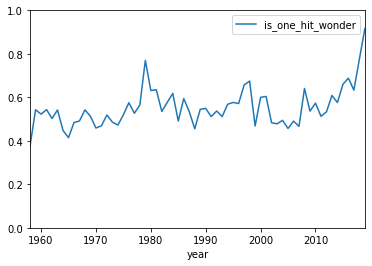

In [25]:
# This charts by debut year, the percentage of main artists who are one hit wonders.

#some context will help with this chart, but I think it's a good start. 

one_hit_wonder_yearly_groupby.plot()
plt.ylim(0,1)

In [26]:
one_hit_wonder_yearly_groupby.head(100)

,is_one_hit_wonder
year,
1958,0.377273
1959,0.542986
1960,0.522727
1961,0.543478
1962,0.502674
1963,0.541899
1964,0.447674
1965,0.414474
1966,0.483871


In [27]:
newest_df = newest_df.sort_values(by=['main_performer']) 

In [28]:
newest_df.head(2000)

,is_one_hit_wonder,year
main_performer,,
"""Groove"" Holmes",0,1966
"""Little"" Jimmy Dickens",1,1965
"""Pookie"" Hudson",1,1963
"""Weird Al"" Yankovic",0,1983
'N Sync,0,1998
'N Sync & Gloria Estefan,1,1999
'Til Tuesday,0,1985
(+44),1,2006
(The Preacher) Bobby Womack,1,1972


# Next Step: Redoing process for "True One-Hit Wonders"- musicians with a hit in the Top 40. 

In [29]:
billboard_df.head(200)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,chart_points
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1.0,1990-02-10,2,10,1990,Jane Child,None,26.0
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2.0,1990-02-17,2,17,1990,Jane Child,None,48.0
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3.0,1990-02-24,2,24,1990,Jane Child,None,58.0
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4.0,1990-03-03,3,3,1990,Jane Child,None,64.0
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5.0,1990-03-10,3,10,1990,Jane Child,None,74.0
5,1990-03-17,24,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,27.0,24,6.0,1990-03-17,3,17,1990,Jane Child,None,77.0
6,1990-03-24,12,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,24.0,12,7.0,1990-03-24,3,24,1990,Jane Child,None,89.0
7,1990-03-31,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,12.0,6,8.0,1990-03-31,3,31,1990,Jane Child,None,95.0
8,1990-04-07,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,6,9.0,1990-04-07,4,7,1990,Jane Child,None,95.0
9,1990-04-14,2,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,2,10.0,1990-04-14,4,14,1990,Jane Child,None,99.0


In [30]:
top_40_df = billboard_df[billboard_df['week_position'] < 41 ]

In [31]:
top_40_df.week_position.value_counts()

18    3180
15    3179
26    3179
5     3179
34    3179
8     3179
30    3179
40    3178
12    3178
16    3178
14    3178
9     3178
11    3178
7     3178
4     3178
3     3178
2     3178
17    3178
20    3178
1     3178
38    3178
22    3178
23    3178
24    3178
25    3178
27    3178
37    3178
28    3178
36    3178
31    3178
32    3178
33    3178
6     3177
35    3177
21    3177
10    3177
39    3177
13    3177
29    3177
19    3176
Name: week_position, dtype: int64

In [32]:
# STEP 1: creating initial groupby
# note: I might have to play with some resetting of indices: not sure yet

top_40_main_performer_groupby = top_40_df.groupby(['main_performer']).nunique()

In [33]:

top_40_main_performer_groupby['is_true_one_hit_wonder'] = top_40_main_performer_groupby.song_id.apply(lambda x: 1 if x ==1 else 0)

In [34]:
# dropping all extraneous columns from main_performer_groupby
top_40_main_performer_groupby = top_40_main_performer_groupby.drop(columns=['week_id', 'week_position', 'song', 'performer', 'song_id', 'instance', 'prev_week_position', 'peak_position', 'weeks_on_chart', 'date', 'month', 'day', 'year', 'featured_performer', 'main_performer', 'chart_points'])

In [35]:
top_40_main_performer_groupby= top_40_main_performer_groupby.reset_index()

In [36]:
# STEP 3: recreating "debut year" dataframe, for eventual join 
top_40_main_performer_min_year_groupby = top_40_df.groupby(['main_performer']).year.min().to_frame().reset_index()

In [37]:
# Step 4: Join the two groupbys to have performer, year, and one-hit-wonder status

top_40_newest_df = top_40_main_performer_groupby.set_index('main_performer').join(top_40_main_performer_min_year_groupby.set_index('main_performer'))

In [38]:
top_40_one_hit_wonder_yearly_groupby = top_40_newest_df.groupby(['year']).mean()

(0, 1)

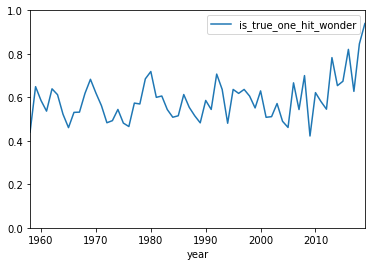

In [39]:
top_40_one_hit_wonder_yearly_groupby.plot()
plt.ylim(0,1)

# Ok so far we have 

## A) percentage of unique artists who are one-hit wonders
## B) percentage of unique Top 40 artists who only appeared in the Top 40 once

# I guess the next logical step would be a groupby per year with the ratio of (unique artists who are top 40 one-hit wonders) divided by (all unique artists)

In [40]:
billboard_df.main_performer.nunique()

7924

In [41]:
billboard_df.groupby(['year']).main_performer.nunique()

year
1958    220
1959    351
1960    331
1961    398
1962    381
1963    387
1964    375
1965    376
1966    410
1967    402
1968    384
1969    397
1970    422
1971    407
1972    400
1973    351
1974    347
1975    402
1976    400
1977    369
1978    346
1979    386
1980    361
1981    339
1982    339
1983    345
1984    316
1985    290
1986    312
1987    303
1988    300
1989    301
1990    297
1991    314
1992    291
1993    303
1994    308
1995    317
1996    290
1997    312
1998    354
1999    268
2000    279
2001    261
2002    265
2003    263
2004    267
2005    273
2006    301
2007    279
2008    294
2009    279
2010    252
2011    259
2012    241
2013    276
2014    274
2015    273
2016    267
2017    287
2018    306
2019    217
Name: main_performer, dtype: int64

In [42]:
newest_df.head(200)

,is_one_hit_wonder,year
main_performer,,
"""Groove"" Holmes",0,1966
"""Little"" Jimmy Dickens",1,1965
"""Pookie"" Hudson",1,1963
"""Weird Al"" Yankovic",0,1983
'N Sync,0,1998
'N Sync & Gloria Estefan,1,1999
'Til Tuesday,0,1985
(+44),1,2006
(The Preacher) Bobby Womack,1,1972


In [43]:
top_40_main_performer_groupby.head(200)

,main_performer,is_true_one_hit_wonder
0,"""Little"" Jimmy Dickens",1
1,"""Weird Al"" Yankovic",0
2,'N Sync,0
3,'N Sync & Gloria Estefan,1
4,'Til Tuesday,0
5,"10,000 Maniacs",0
6,100 Proof Aged in Soul,1
7,10cc,0
8,112,0
9,12 Gauge,1


# Ok, this is what I need:

1) count of unique main_performers per year
2) count of true one hit wonders per ear: I can get this by doing a groupby sum
3) groupby year 
4) calculate new column of ratio

In [44]:
top_40_one_hit_wonder_yearly_groupby.head(200)

,is_true_one_hit_wonder
year,
1958,0.440367
1959,0.649123
1960,0.585106
1961,0.536585
1962,0.639175
1963,0.612245
1964,0.522222
1965,0.460674
1966,0.530864


In [45]:
top_40_one_hit_wonder_yearly_summed_groupby = top_40_newest_df.groupby(['year']).sum()

In [46]:
top_40_one_hit_wonder_yearly_summed_groupby = top_40_one_hit_wonder_yearly_summed_groupby.reset_index()

In [47]:
top_40_one_hit_wonder_yearly_summed_groupby.head(200)

,year,is_true_one_hit_wonder
0,1958,48
1,1959,74
2,1960,55
3,1961,66
4,1962,62
5,1963,60
6,1964,47
7,1965,41
8,1966,43
9,1967,50


In [48]:
top_40_newest_df.head()

,is_true_one_hit_wonder,year
main_performer,,
"""Little"" Jimmy Dickens",1,1965
"""Weird Al"" Yankovic",0,1984
'N Sync,0,1998
'N Sync & Gloria Estefan,1,1999
'Til Tuesday,0,1985


In [49]:
artist_count_groupby = billboard_df.groupby(['year']).nunique()

In [50]:
artist_count_groupby.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,chart_points
year,,,,,,,,,,,,,,,,
1958,22,100,338,220,352,2,100,100,22,22,5,18,1,220,0,100
1959,52,100,641,351,663,3,100,100,26,52,12,31,1,351,0,100
1960,53,100,668,334,700,3,100,100,27,53,12,31,1,331,5,100
1961,52,100,747,399,779,4,100,100,26,52,12,30,1,398,3,100
1962,52,100,748,382,768,5,100,100,40,52,12,31,1,381,2,100


In [51]:
# so the only columns I want here are year and main_performer

artist_count_groupby = artist_count_groupby.drop(columns=['week_id', 'week_position', 'song', 'performer', 'song_id', 'instance', 'prev_week_position', 'peak_position', 'weeks_on_chart', 'date', 'month', 'day', 'year', 'featured_performer', 'chart_points'])

In [52]:
artist_count_groupby = artist_count_groupby.reset_index()

In [53]:
# Step 4: Join the two groupbys to have performer, year, and one-hit-wonder status

airplane_df = top_40_one_hit_wonder_yearly_summed_groupby.set_index('year').join(artist_count_groupby.set_index('year'))

In [54]:
airplane_df.head(200)

,is_true_one_hit_wonder,main_performer
year,,
1958,48,220
1959,74,351
1960,55,331
1961,66,398
1962,62,381
1963,60,387
1964,47,375
1965,41,376
1966,43,410


In [55]:
#note: change "airplane_df", change "wonders" to "wonder"

airplane_df['pct_true_one_hit_wonders'] = airplane_df.apply(lambda row: row.is_true_one_hit_wonder / row.main_performer, axis=1)

In [56]:
airplane_df.head(200)

,is_true_one_hit_wonder,main_performer,pct_true_one_hit_wonders
year,,,
1958,48,220,0.218182
1959,74,351,0.210826
1960,55,331,0.166163
1961,66,398,0.165829
1962,62,381,0.162730
1963,60,387,0.155039
1964,47,375,0.125333
1965,41,376,0.109043
1966,43,410,0.104878


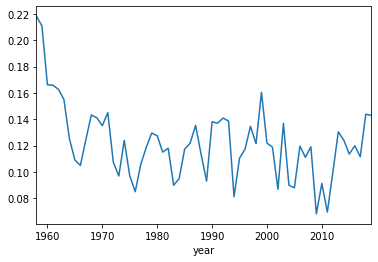

In [57]:
airplane_df.pct_true_one_hit_wonders.plot()

In [58]:
airplane_df.pct_true_one_hit_wonders.describe()

count    62.000000
mean      0.122306
std       0.028211
min       0.068100
25%       0.106143
50%       0.119726
75%       0.136928
max       0.218182
Name: pct_true_one_hit_wonders, dtype: float64

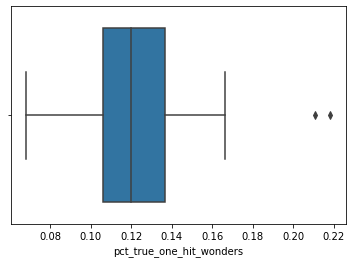

In [59]:
ax = sns.boxplot(x="pct_true_one_hit_wonders", data=airplane_df)

(0, 500)

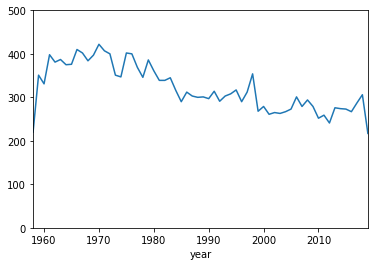

In [60]:
airplane_df.main_performer.plot()
plt.ylim(0,500)

(0, 100)

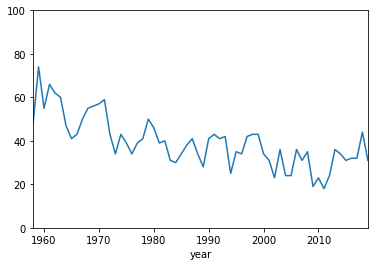

In [61]:
airplane_df.is_true_one_hit_wonder.plot()
plt.ylim(0,100)

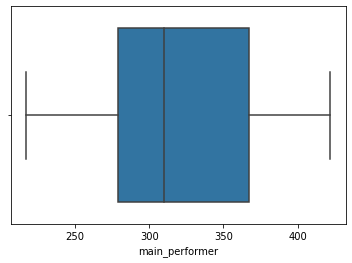

In [62]:
ax = sns.boxplot(x="main_performer", data=airplane_df)

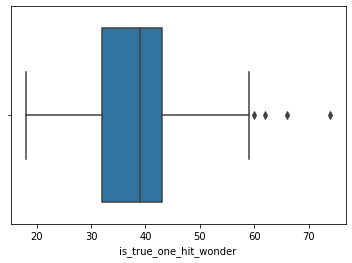

In [63]:
ax = sns.boxplot(x="is_true_one_hit_wonder", data=airplane_df)

# One more: I'm going to do by year, the # of true one hit wonders divided by the number of artists who made their debut in that year, so I can have the percentage of artists per year who were true one hit wonders

In [64]:
# creating minimum groupby

minimum_performer_groupby = billboard_df.groupby(['main_performer']).min()

In [65]:
minimum_performer_groupby.head(200)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,chart_points
main_performer,,,,,,,,,,,,,,
"""Groove"" Holmes",1966-06-25,44,Misty,"""Groove"" Holmes","Misty""Groove"" Holmes",1,44.0,44,1.0,1966-06-25,6,1,1966,1.0
"""Little"" Jimmy Dickens",1965-10-16,15,May The Bird Of Paradise Fly Up Your Nose,"""Little"" Jimmy Dickens","May The Bird Of Paradise Fly Up Your Nose""Litt...",1,15.0,15,1.0,1965-10-16,10,4,1965,11.0
"""Pookie"" Hudson",1963-05-25,96,I Know I Know,"""Pookie"" Hudson","I Know I Know""Pookie"" Hudson",1,NaN,96,1.0,1963-05-25,5,25,1963,5.0
"""Weird Al"" Yankovic",1983-04-30,9,Amish Paradise,"""Weird Al"" Yankovic","Amish Paradise""Weird Al"" Yankovic",1,9.0,9,1.0,1983-04-30,1,1,1983,1.0
'N Sync,1998-03-07,1,(God Must Have Spent) A Little More Time On You,'N Sync,(God Must Have Spent) A Little More Time On Yo...,1,1.0,1,1.0,1998-03-07,1,1,1998,1.0
'N Sync & Gloria Estefan,1999-09-04,2,Music Of My Heart,'N Sync & Gloria Estefan,Music Of My Heart'N Sync & Gloria Estefan,1,2.0,2,1.0,1999-09-04,1,1,1999,3.0
'Til Tuesday,1985-04-13,8,(Believed You Were) Lucky,'Til Tuesday,(Believed You Were) Lucky'Til Tuesday,1,8.0,8,1.0,1985-04-13,1,1,1985,3.0
(+44),2006-12-02,89,When Your Heart Stops Beating,(+44),When Your Heart Stops Beating(+44),1,NaN,89,1.0,2006-12-02,12,2,2006,12.0
(The Preacher) Bobby Womack,1972-05-06,60,Woman's Gotta Have It,(The Preacher) Bobby Womack,Woman's Gotta Have It(The Preacher) Bobby Womack,1,60.0,60,1.0,1972-05-06,5,1,1972,7.0


In [66]:
# dropping extraneous columns 
# dropping all extraneous columns from main_performer_groupby
minimum_performer_groupby = minimum_performer_groupby.drop(columns=['week_id', 'week_position', 'song', 'performer', 'song_id', 'instance', 'prev_week_position', 'peak_position', 'weeks_on_chart', 'date', 'month', 'day', 'chart_points'])

In [67]:
minimum_performer_groupby = minimum_performer_groupby.reset_index()

In [68]:
# Note: this was the wrong thing to do, but it actually is kinda useful if I want to do 

minimum_performer_yearly_groupby = minimum_performer_groupby.groupby(['year']).nunique()

In [69]:
minimum_performer_yearly_groupby.head(500)

,main_performer,year
year,,
1958,220,1
1959,221,1
1960,176,1
1961,230,1
1962,187,1
1963,179,1
1964,172,1
1965,152,1
1966,186,1


(0, 250)

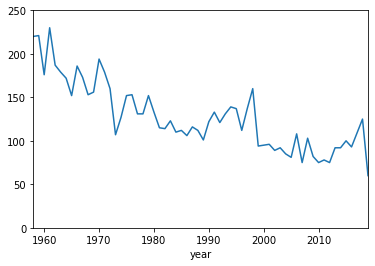

In [70]:
minimum_performer_yearly_groupby.main_performer.plot()
plt.ylim(0,250)

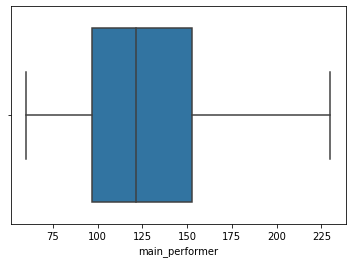

In [71]:
ax = sns.boxplot(x="main_performer", data=minimum_performer_yearly_groupby)

In [72]:
minimum_performer_yearly_groupby.main_performer.describe()

count     62.000000
mean     127.806452
std       39.156198
min       60.000000
25%       97.000000
50%      121.500000
75%      152.750000
max      230.000000
Name: main_performer, dtype: float64

In [73]:
# ok so now we need to join the artists who debuted per year with the true one hit wonders 
top_40_newest_df.is_true_one_hit_wonder.value_counts().sum()

4209

In [74]:
billboard_df.main_performer.nunique()

7924

In [75]:
newest_df.is_one_hit_wonder.value_counts().sum()

7924

In [76]:
newest_df.head(200)

,is_one_hit_wonder,year
main_performer,,
"""Groove"" Holmes",0,1966
"""Little"" Jimmy Dickens",1,1965
"""Pookie"" Hudson",1,1963
"""Weird Al"" Yankovic",0,1983
'N Sync,0,1998
'N Sync & Gloria Estefan,1,1999
'Til Tuesday,0,1985
(+44),1,2006
(The Preacher) Bobby Womack,1,1972


In [77]:
second_airplane_df = newest_df.groupby(['year']).sum()

In [78]:
second_airplane_df.head(200)

,is_one_hit_wonder
year,
1958,83
1959,120
1960,92
1961,125
1962,94
1963,97
1964,77
1965,63
1966,90
